# ABSENTEEISM AT WORK - Case Study:
- Dilverables: Discovering the hidden patterns in data, to distinguish genuine work absences from fraudulent ones.
- Techinques: Estimating Conditional Probablities, Bayes Theorem, Kolmogorov-Simirnov test, Box-Cox and Yeo-Johnson transformation.
- Tools: Pandas, Matplotlib, seaborn,

## 1. Import Libraries and Dataset:
Importing the necessary libraries for exploring the data, in this stage, libraries will be loaded as per their standard alias and the dataset will be imported.

In [ ]:
# importing the necessary class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'#FAF5EF'})


In [ ]:
data = pd.read_csv('Absent.csv',sep=';')

In [ ]:
print(f"Data Dimension:{data.shape}")
for column in data.columns:
    print(f"Column: {column:45} | Type:{str(data[column].dtype):7} \
       | Missing Values: {data[column].isna().sum():3d}")

Data Dimension:(740, 21)
Column: ID                                            | Type:int64          | Missing Values:   0
Column: Reason for absence                            | Type:int64          | Missing Values:   0
Column: Month of absence                              | Type:int64          | Missing Values:   0
Column: Day of the week                               | Type:int64          | Missing Values:   0
Column: Seasons                                       | Type:int64          | Missing Values:   0
Column: Transportation expense                        | Type:int64          | Missing Values:   0
Column: Distance from Residence to Work               | Type:int64          | Missing Values:   0
Column: Service time                                  | Type:int64          | Missing Values:   0
Column: Age                                           | Type:int64          | Missing Values:   0
Column: Work load Average/day                         | Type:float64        | Missing Values:

There are 21 columns in the dataset, only 1 column **work load Average/day** does not contain any integral values. There are no missing values in the row.

In [ ]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
# Computing the summary statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


Columns such as, ** Month of absense, Day of the week, Seasons, Education, Disciplinary Failure, Social drinker and Social smoker** are categorical values. 

In [ ]:
# Defining the encoding dictionaries:
month_encoded = {1: 'January', 2: 'Febuary', 3: 'March',
                 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September',
                 10: 'October', 11: 'November', 12: 'December',
                 0: 'Unknown'}


In [ ]:
day_encoded = {2:'Monday', 3:'Tuesday',
                4:'Wednesday', 5:'Thursday', 6:'Friday'}


In [ ]:
season_encoded = {1:'Spring', 2:'Summer',
                  3:'Fall', 4:'Winter'}

In [ ]:
education_encoded = {1:'High_school', 2:'Graduate',
                     3:'Post_graduate',4:'Master_phD'}

In [ ]:
yes_no_encoded = {0:'No',1:'Yes'}

In [ ]:
# backtransformation numerical variables to categorical
data_preprocessed = data.copy()
# for monthly encoded categorical cvalues
data_preprocessed['Month of absence'] = data_preprocessed['Month of absence']\
            .apply(lambda x: month_encoded[x])

In [ ]:
data_preprocessed['Day of the week'] = data_preprocessed['Day of the week']\
    .apply(lambda x: day_encoded[x])


In [ ]:
data_preprocessed['Seasons'] = data_preprocessed['Seasons']\
         .apply(lambda x: season_encoded[x])

In [ ]:
data_preprocessed['Education'] = data_preprocessed['Education']\
    .apply(lambda x: education_encoded[x])

In [ ]:
data_preprocessed['Disciplinary failure'] = data_preprocessed['Disciplinary failure']\
    .apply(lambda x: yes_no_encoded[x])
    

In [ ]:
data_preprocessed['Social drinker'] =data_preprocessed['Social drinker']\
   .apply(lambda x: yes_no_encoded[x])
   

In [ ]:
data_preprocessed['Social smoker'] =data_preprocessed['Social smoker']\
   .apply(lambda x: yes_no_encoded[x])

In [ ]:
data_preprocessed.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


##### **Reason for absence** column contains information about the absence which is encoded based on the **International Code of Disease(ICD)** the following tables represents the code for each:

| Code   | Description |
|------  |-------------|
1 | Certain infectious and parasitic disease.
2 | Neoplasms.
3 | Diseases of the blood and blood-forming organs and certain disorders involving the immune system.
4 | Endocrne, nutritional and metabolic diseases.
5 | Mental and behavioral disordera.
6 | Diseases of Nervous system.
7 | Diseases of the eye and adncexa.
8| Diseases of the ear and mastoid. process.
9| Diseases of the circulatory sysrem.
10 | Dieases of the respiratory system.
11 | Diseases of the digestive system.
12| Diseases of the skin and sucutaneous tissue.
13| Diseases of the musculoskeletal system and connective tissue.
14 | Diseases of thr genitourinary system.
15 | Pregnancy, childbirth and th e puerperium.
16 | Certain conditions originating in the perinatal period.
17 | Congenital malformations, deformations and chromosomal abnormalities.
18 | Symptoms, signs and abnormal clinical and findings not elsewhere classified.
19 | Injury, poisioning and certain other consequences of external causes.
20 | External causes of morbidity and mortality.
21| Factors influencing heath status. and contact with health services.
22| Patient follow up.
23 | Medical consultation.
24 | Blood donation.
25 | Laaboratory examination.
26 | Unjustified absence.
27 | Physiotherapy.
28 | Dental consultation.
0 | Unknown.

> ** Note ** Values ranging between 1 to 21 represents actual disease, values from 22 to 28 are separate reasons, which do not represent any disease, while 0 is not identified hence it is encoded as unknown.


## 2. Identifying the Reasons for Absence: 
Creating a new variable called "Disease" which indicates whether a specific reason for absense is present in the ICD table or not.

In [ ]:
""" 
Defining a function, which chekcs if the provided integer value 
is contained in the ICD table or not.
"""
def in_icd(val):
    return "Yes" if val >= 1 and val <=21 else "No"

In [ ]:
data_preprocessed['Disease'] = data_preprocessed['Reason for absence'] \
   .apply(in_icd)

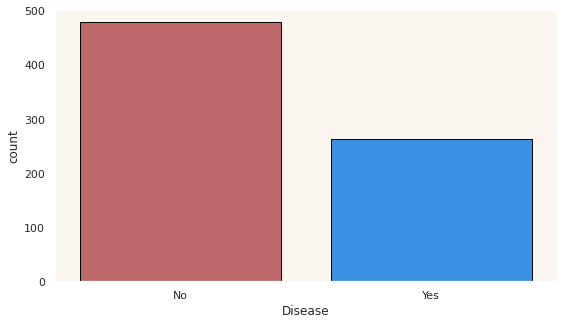

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
colors=['indianred', 'dodgerblue']
sns.countplot(data=data_preprocessed, x='Disease',
              edgecolor='black', palette=colors)
plt.show()

### Interpretating the Graph:
The total number number of enteries is represented by the sum of both yes and no bars.
- Number of reasons for absence in that are not listed in the ICD table is almost twice the number of the reaons that are listed.

## 2.1 Analysing The Reasons for Absence.
In this section, analysis of the column **Reason for absence** is undertaken, to address questions such as.

a) What is the most common reason for absence?

b) Does being a drinker or smoker have influence on absenting?

c) Does the distance to work have some effect on the absenteeism?


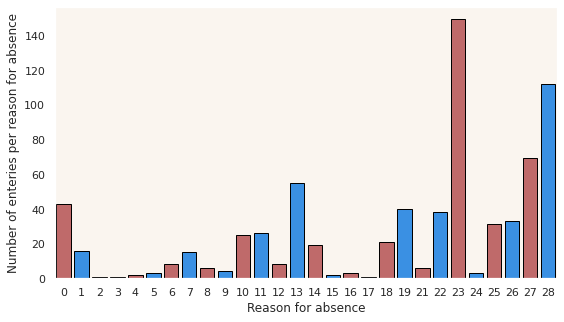

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
# get the number of enteries for each reason for absence:
ax = sns.countplot(data=data_preprocessed,
                   x='Reason for absence', edgecolor='black',
                   palette=['indianred', 'dodgerblue'])
ax.set_ylabel('Number of enteries per reason for absence')
plt.show()

### Interpreting the Graph:
The Numbers on the x-axis are encoded category for ICD related diseases, following asssertions can be made:

- The most frequent reason for absence are **Medical consultation(23)**, **Dental consultation(28)**  and **Physiotherapy(27)**, they are not in the range of 1-21 in ICD table so they do not represent any absence for actual underlying medical disease.
- The most frequent reason for absence which are indeed related to disease, are **Musculoskeletal systemt and connective tissue(13)** ,
and **Injury, poisoning and certain other consequences of external causes(19)**. 



## 2.2 Analysis of Social Drinkers and Smokers:
Analysing the impact of being a drinker or smoker on an enpoyee's absenteeism. As smoking and frequent drinking have negative impact on health coditions, it would mean that certain disease are more frequent in smoker and drinkers than others.

**Note** from the descriptive statistics column, we know that 56% of the employee are drinkers whereas 7% of the employees are smokers.

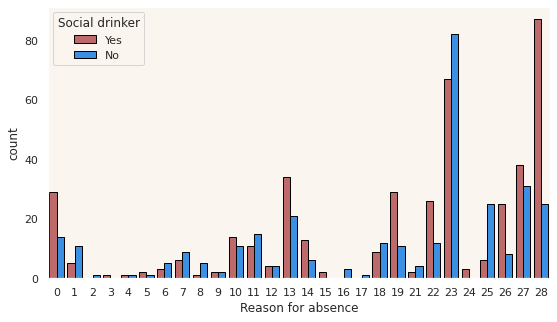

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
sns.countplot(data=data_preprocessed, x='Reason for absence',
              hue='Social drinker', hue_order=['Yes','No'], 
              palette=['indianred', 'dodgerblue'], edgecolor='black')
plt.show()



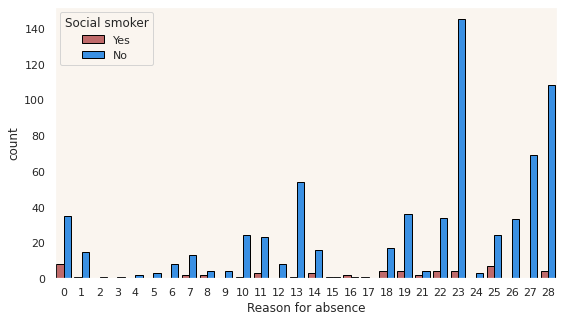

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
sns.countplot(data=data_preprocessed, x='Reason for absence',
              hue='Social smoker', hue_order=['Yes','No'], 
              palette=['indianred', 'dodgerblue'], edgecolor='black')
plt.legend(loc='upper left', title='Social smoker')
plt.show()

In [ ]:
""" 
Calulating the number of actual count for social drinkers
and social smokers.
"""
print(data_preprocessed['Social drinker'].value_counts(normalize=True))
print(data_preprocessed['Social smoker'].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


### Interpeting the Graph:
From the resulting plots, a significant difference between drinkers and non drinkers can be observed in absence related to **Dental consultation(28)**.
Furthermore, as the number of smoker is quite small (only 7%) of the entries  it is very hard to say whether there is actually a relationship between the absence reasons and smoking. 

## 2.3  Identifying the Reasons of Absence with Higher Probabilities among Drinkers and Smokers:

Computing the conditional probabilities of the different reasons for absence, assuming that the employee is a social drinker or smoker.


In [ ]:
""" 
Computing probabilities of bieng a drinker and smoker.
"""
drinker_prob = data_preprocessed['Social drinker']\
     .value_counts(normalize=True)['Yes']
smoker_prob = data_preprocessed['Social smoker']\
     .value_counts(normalize=True)['Yes']
print(f'P(Social Drinker) = {drinker_prob:.3f} \
| P(Social Smoker) = {smoker_prob:.3f}')

P(Social Drinker) = 0.568 | P(Social Smoker) = 0.073


In [ ]:
"""
Computing the probabilities of being a social drinker/smoker and
absent for each reason of absence, by creating mask for drinkers and
smoker then calculating the total number of entries and number of 
absence reason masked by drinkers and smoker.
"""
drinker_mask = data_preprocessed['Social drinker'] == 'Yes'
smoker_mask = data_preprocessed['Social smoker'] == 'Yes'

total_entries = data_preprocessed.shape[0]

absence_drinker_prob = data_preprocessed['Reason for absence']\
   [drinker_mask].value_counts() / total_entries

absence_smoker_prob = data_preprocessed['Reason for absence']\
   [smoker_mask].value_counts() / total_entries

In [ ]:
""" 
Computing the conditional probabilities by dividing the computed
probabilities for each reason for absence.
"""
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob['P(Absence | Social Drinker)'] = absence_drinker_prob\
/drinker_prob
cond_prob['P(Absence | Social Smoker)'] = absence_smoker_prob\
/smoker_prob

<Figure size 432x288 with 0 Axes>

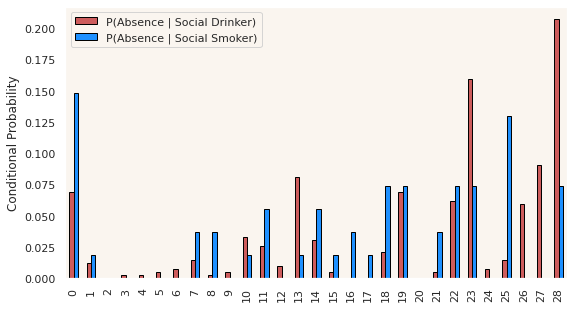

In [ ]:
plt.figure()
ax = cond_prob.plot.bar(figsize=(9,5), grid=False, edgecolor='black', 
                        color=['indianred','dodgerblue'])
ax.set_ylabel('Conditional Probability')
plt.show()

### Interpreting the Graph:
The highest reason for absence fro drinkers is **Dental consultation(28)**  followed by **Medical consultation(23)**, for smoker's absence hoever are mostly due to **Unknown reasons (0)** and **Laboratory examination(25)**

In [ ]:
"""
Computing the reason for absence probabilities.
"""
absence_prob = data_preprocessed['Reason for absence']\
    .value_counts(normalize=True)


In [ ]:
""" 
Computing the conditional probability for drinker and smoker.
"""
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker['P(Social Drinker | Absence)'] = \
cond_prob['P(Absence | Social Drinker)'] * drinker_prob/absence_prob

cond_prob_drinker_smoker['P(Social Smoker | Absence)'] = \
cond_prob['P(Absence | Social Smoker)'] * smoker_prob/absence_prob 

<Figure size 432x288 with 0 Axes>

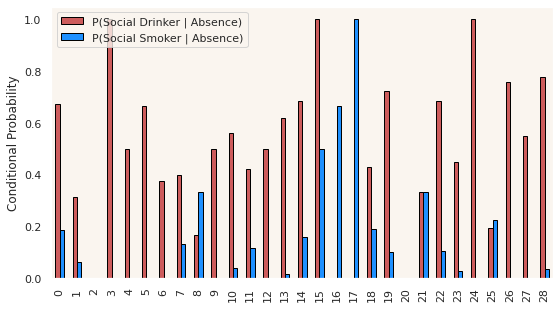

In [ ]:
plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(9,5),grid=False, edgecolor='black', 
                        color=['indianred','dodgerblue'])
ax.set_ylabel('Conditional Probability')
plt.show()

### Interpreting the Graph:
From the resulting plot, the conditional probability of being social drinker or smoker quite high, once an absence with certain reason occurs. This is due to the fact that number of entries is very small, as such, if all the registered employees who were absent for certain reason are smokers, the probability of being a smoker, once that reason has been registered and will be equal to one.

## 2.4 Analysing the Distribution  of Hours of Absenteeism :
Analusing the distribution based on two classes: being a drinker and smoker vs not being a drinker and smoker.

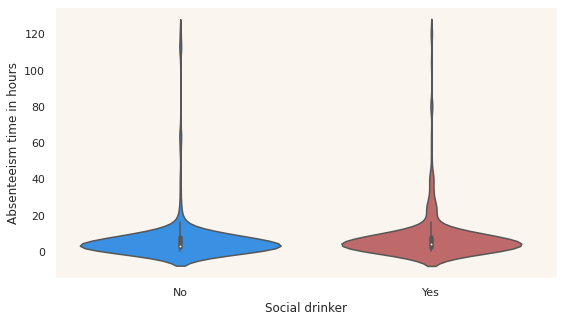

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
sns.violinplot(data= data_preprocessed,x='Social drinker',
               y='Absenteeism time in hours', order=['No','Yes'],
               palette=['dodgerblue','indianred'])
plt.show()

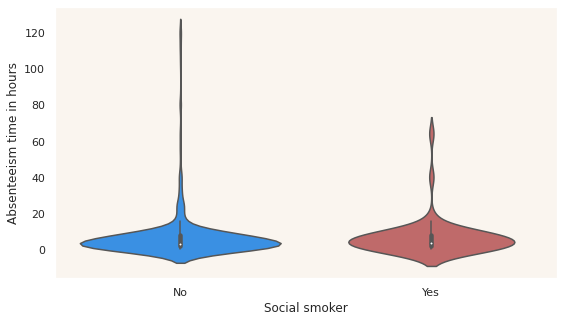

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
sns.violinplot(data= data_preprocessed,x='Social smoker',
               y='Absenteeism time in hours', order=['No','Yes'],
               palette=['dodgerblue','indianred'])
plt.show()

### Interpreting the Graph:
There are some differences in the outliers of drinker and smokers, but there is no substantial difference between their distribution of absenteeism in hours.

# 3. Statistical Analysis:


## 3.1 Hypothesis Testing:
To assess the average absenteeism time in hours is same for both drinkers and non-drinkers ( with Null- Hypothesis)

In [ ]:
from scipy.stats import ttest_ind
hours_col = 'Absenteeism time in hours'

# test mean absenteeism for drinkers 
drinkers_mask = data_preprocessed['Social drinker'] == 'Yes'
hours_drinkers = data_preprocessed.loc[drinker_mask, hours_col]
hours_non_drinkers = data_preprocessed.loc[~ drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f'Statistic Value: {drinkers_test[0]},\
 p-value: {drinkers_test[1]}')


Statistic Value: 1.7713833295243993, p-value: 0.07690961828294651


In [ ]:
# test mean absenteeism for smokers
smokers_mask = data_preprocessed['Social smoker'] == 'Yes'
hours_smokers = data_preprocessed.loc[smokers_mask, hours_col]
hours_non_smokers = data_preprocessed.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers,hours_non_smokers)
print(f'Statistic Value: {smokers_test[0]},\
 p-value: {smokers_test[1]}')

Statistic Value: -0.24277795417700243, p-value: 0.8082448720154971


### Interpretation:

The P-Value of both the tests is above the critical value of 0.05, which means that the null hypothesis cannot be rejected. Simply put, we cannot say there is a statistically significant difference in the absenteeism hours between drinkes and smoker and non-drinkers and non-smokers.

## 3.2 Kolmogorov-Smirnov Test:

In [ ]:
"""
Performing the kolmogorov-Smirnov test for comparing the
distributions.
"""
from scipy.stats import ks_2samp
ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f'Drinkers comparison: Statistics = {ks_drinkers[0]:.3f}, \
 P-value = {ks_drinkers[1]:.3f}')
print(f'Smokers comparison: Statistics = {ks_smokers[0]:.3f}, \
 P-value = {ks_smokers[1]:.3f}')



Drinkers comparison: Statistics = 0.135,  P-value = 0.002
Smokers comparison: Statistics = 0.104,  P-value = 0.607


### Interpretation:
The P-value for the drinkers dataset is lower than the critical point 0.05, which is strong evidence against the null hypothesis of the two distributions being equal. on the other hand, as the P-value for the smokers dataset is higher than 0.05, we cannot reject the null hypothese.

# 4.  Impact of Body Mass Index (BMI) on Absenteeism of Employee:
BMI is a n=universal way to classify people as ** underweight, healthy, weight, overweight and obese** based on tissue mass( muscle, fat and bone) and height.





In [ ]:
"""
Defining a function for computing the BMI category, based on
BMI value.
"""
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = 'underweight'
    elif bmi >= 18.5 and bmi < 25:
        category = 'healthy weight'
    elif bmi >= 25 and bmi < 30:
        category = 'overweight'
    else:
        category = 'obese'
    return category

# compute bmi Category
data_preprocessed['BMI category'] = \
    data_preprocessed['Body mass index'].apply(get_bmi_category)

## 4.1 Distribution of BMI for each category:


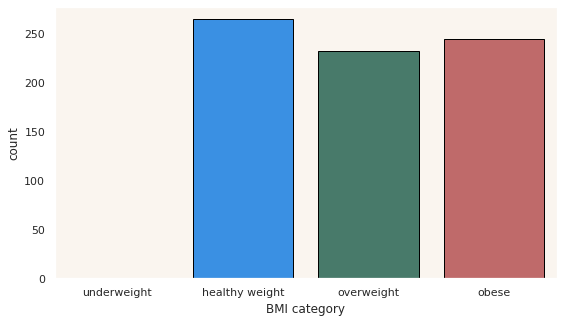

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
colors2= ['#CBC3E3','dodgerblue',
                       '#40826D','indianred']
sns.countplot(data=data_preprocessed, x='BMI category',
              edgecolor='black',
              order=['underweight', 'healthy weight',
                     'overweight', 'obese'], 
              palette=colors2)
plt.show()

### Interpreting the Graph:
There are no entries for the underweight category, there on the data is uniformly distributed among the remaining three categories.
around 60% of the the employees are either overweight or obese.


## 4.2 Analysing how BMI Categories Influences the Reason for Absence:


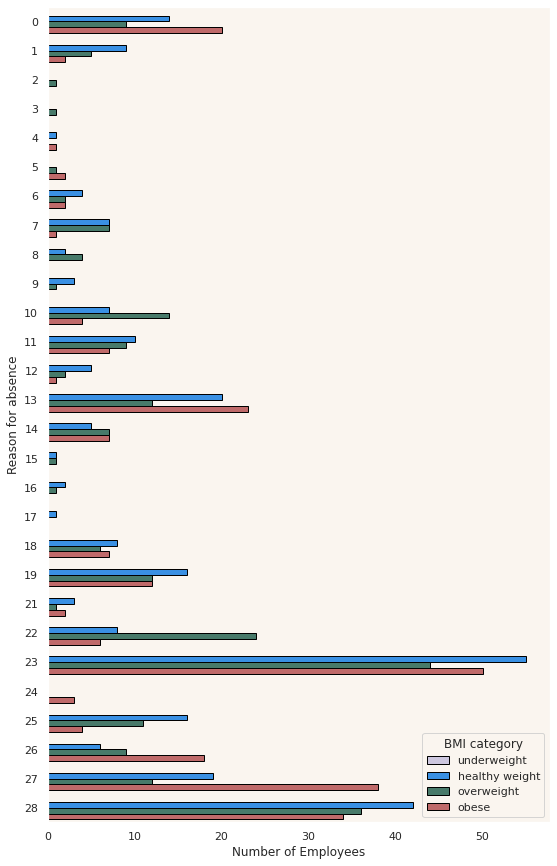

In [ ]:
plt.figure(figsize=(9,15))
plt.grid(False)
ax = sns.countplot(data=data_preprocessed, y = 'Reason for absence',
                   hue='BMI category', edgecolor='black',
        hue_order=['underweight','healthy weight',
                   'overweight','obese'],
        palette=colors2)

ax.set_xlabel('Number of Employees')
plt.show()


### Interpretating the Graph:
There are no clear pattern from the following graph. Simply put, the reason of absence, is almost equal for employees of each BMI catgeory.

## 4.3 Analysing the Distribution of Absence Hours for the Different BMI Category:


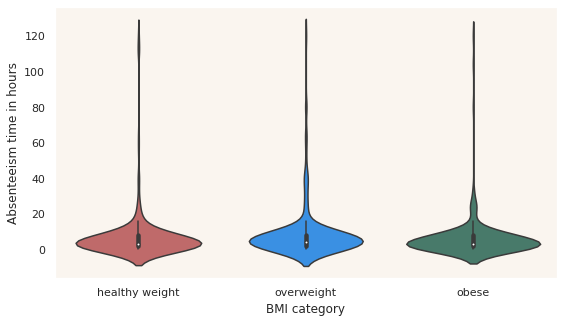

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
colors3 = ['indianred','dodgerblue','#40826D']
sns.violinplot(data=data_preprocessed, x='BMI category',
               y='Absenteeism time in hours', 
               palette=colors3,
               order=['healthy weight', 'overweight','obese',])
plt.show()

### Interpreting the Graph:
Observing the graph, it is very clear that BMi has little to no influence on the absenteeism of the employees.

## 5. Influence of Age:

Age may also influence employees' absenteeism. For instance, older employees might need more frequent medical treatment, whereas younger employees might be less prone to being absent.

First, investigating the  correlation  between  age  and  absence  hours. with the help of, regression plot, in which we'll plot the  Age  column on the  x  axis and  Absenteeism time in hours on the  y  axis. Analysis also includes the Pearson's correlation coefficient and its p-value, where the null hypothesis is that the correlation coefficient between the two features is equal to zero.

## 5.1 Age and Absenteeism Time In Hours:

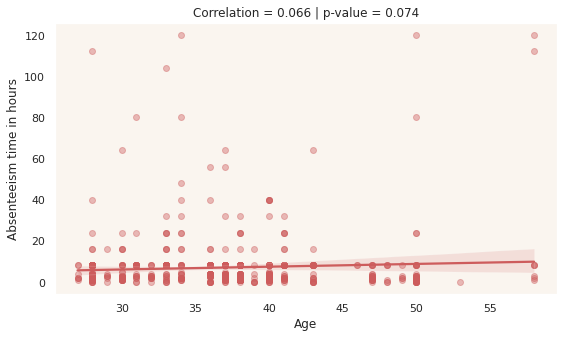

In [ ]:
""" 
Computing the Pearson's correlation coefficent ans p-value.
"""
from scipy.stats import pearsonr
pearson_test=  pearsonr(data_preprocessed['Age'],\
                      data_preprocessed['Absenteeism time in hours'])

"""
Creating regression plot and adding the correaltion coefficient
in the title.
"""
plt.figure(figsize=(9,5))
plt.grid(False)
ax = sns.regplot(data=data_preprocessed, x="Age",
                 y='Absenteeism time in hours', 
                 scatter_kws={'alpha':0.4}, color='indianred')
ax.set_title(f'Correlation = {pearson_test[0]:.3f} \
| p-value = {pearson_test[1]:.3f}')
plt.show()

### Interpreting the Graph:
From the resulting plot, no significant pattern can be observed.Furthermore, the correlation coefficientis extremely small at just (0.066) and the p-value is above the threshold of 0.05, which indicates that there is no relationship between **Age** and **Absenteeism time in hours**.

## 5.2 Investigating the Relatonship of Age and Disease:


<function matplotlib.pyplot.show>

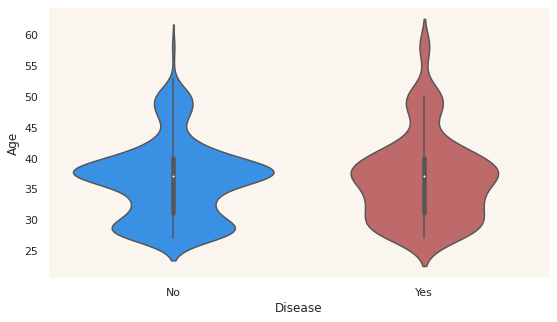

In [ ]:
"""
Creating violine plot to understand the relationship between
Age and Diseases columns.
"""
plt.figure(figsize=(9,5))
plt.grid(False)
sns.violinplot(data=data_preprocessed, x='Disease',
               y='Age', palette=['dodgerblue','indianred'])
plt.show

### Interpreting the Graph:
It can be observed, the differences between the two distributions of age,
for samples with ICD encoded reasons for absence(labeled **Yes**). it can be seen that there more samples present for older employees.

To confirm this performing **Hypothesis Tests** on the means and distributions of the two groups.

In [ ]:
"""
Get age entries for employees with Diseases == Yes and
Disease == No.
"""
disease_mask = data_preprocessed['Disease'] == 'Yes'
disease_ages = data_preprocessed['Age'][disease_mask]
no_disease_ages = data_preprocessed['Age'][~ disease_mask]


In [ ]:
"""
Perform hypothesis test for equality of means.
"""
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f'Test for Equality of Means: Statistics = {test_res[0]:0.3f}, \
P-Value = {test_res[1]:0.3f}')

""" 
Test for equality of ditributions with the help of 
Kolmogorov-Smirnov test.
"""
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f'KS Test for Equality of Distribution: Statistics =  {ks_res[0]:0.3f}, \
P-Value = {ks_res[1]:0.3f}')




Test for Equality of Means: Statistics = 0.630, P-Value = 0.529
KS Test for Equality of Distribution: Statistics =  0.057, P-Value = 0.619


### Interpretaion:
From the results of the two test, it can be concluded that there is no statistically significant difference between the two distribution, Thus, age is neither an indicator for length of an absence nor for its type.

## 5.3 Investigating the Relationship Between Age and Reason for Absence:

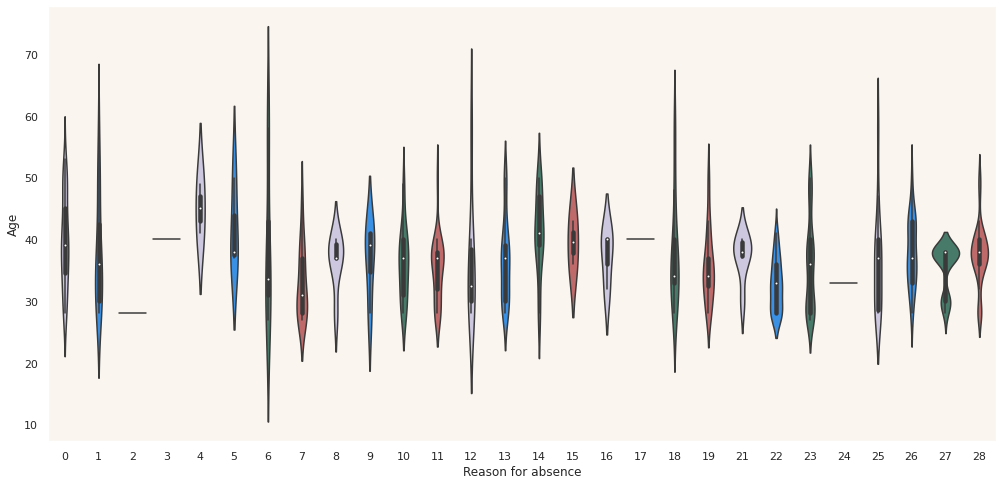

In [ ]:
plt.figure(figsize=(17,8))
plt.grid(False)
sns.violinplot(data=data_preprocessed, x='Reason for absence',
               y='Age', palette=colors2)
plt.show()

### Interpreting the Graph:
It can concluded from the resulting graph, that age bears 0 influence on employee's absenteeism.

## 6. Investigating the Influence of Education:


Analysing the realtionship between the **Reason for Absence** and **Education**.Starting by looking at the percentage of employees with certain educational degree and relating the numbers to the various reasons for absence.

## 6.1 Computing the Percenatge of Employees and the Degrees they hold:

In [ ]:
""" 
Computing the percentage of employees per education level.
"""
education_types = ['High_school', 'Graduate',
                   'Post_graduate','Master_phD']
counts = data_preprocessed['Education'].value_counts()
percentages = data_preprocessed['Education'].value_counts(normalize=True)
for educ_type in education_types:
    print(f'Education Type: {educ_type:13s}  |  Counts: {counts[educ_type]:6.1f}| Percentage: {100*percentages[educ_type]:4.1f}')


Education Type: High_school    |  Counts:  611.0| Percentage: 82.6
Education Type: Graduate       |  Counts:   46.0| Percentage:  6.2
Education Type: Post_graduate  |  Counts:   79.0| Percentage: 10.7
Education Type: Master_phD     |  Counts:    4.0| Percentage:  0.5


### Interpretation:
It can be observed that most of the meployees in that data have high school degree(82.6) which means that data is highly biased towards these employees.

## 6.2 Distribution of Education and Number of Hours of Absence:

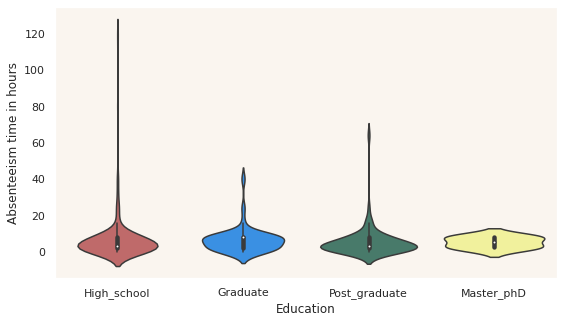

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
colors4 = ['indianred','dodgerblue','#40826D','#FFFF8F']
sns.violinplot(data=data_preprocessed, x= 'Education',
               y='Absenteeism time in hours',
               palette=['indianred','dodgerblue','#40826D','#FFFF8F'],
               order=['High_school','Graduate',
                      'Post_graduate','Master_phD'])
plt.show()

It appears most of the extreme cases of absence are for lower education levels.

In [ ]:
"""
Mean and Standard Deviation of the absence of duration.
"""
education_types = ['High_school', 'Graduate',
                   'Post_graduate','Master_phD']
for educ_type in education_types:
    mask = data_preprocessed['Education'] == educ_type
    hours = data_preprocessed['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f'Education Type: {educ_type:13s} | Mean: {mean:.03f} \
    | Standard Deviation: {stddev:.03f}')

Education Type: High_school   | Mean: 7.190     | Standard Deviation: 14.259
Education Type: Graduate      | Mean: 6.391     | Standard Deviation: 6.754
Education Type: Post_graduate | Mean: 5.266     | Standard Deviation: 7.963
Education Type: Master_phD    | Mean: 5.250     | Standard Deviation: 3.202


It can be seen that both the mean and standard deviation of the hours of absence are decreasing, meaning highly educated employees rend to have shorter absences. Hence, Higher degree is not the cause of such a phenomenon and is more likely an indication of it.

## 6.3 Education Level and Reasons for Absence:


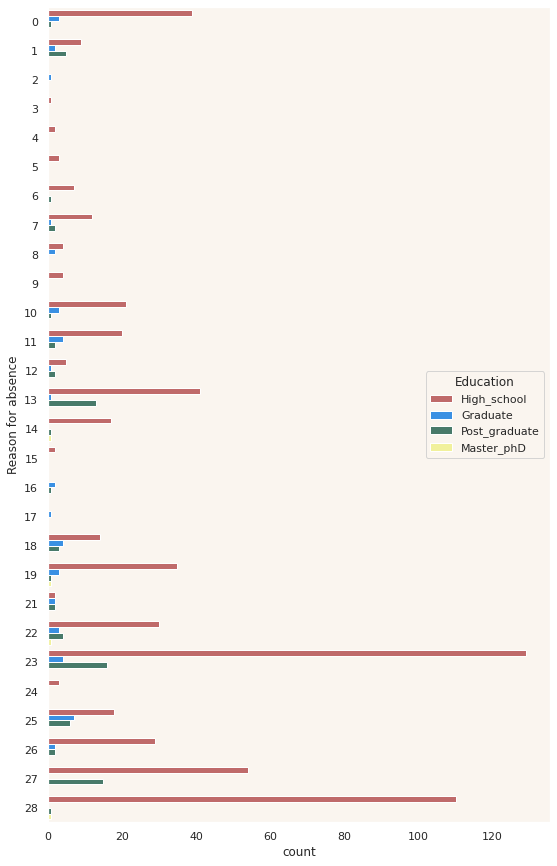

In [ ]:
plt.figure(figsize=(9,15))
plt.grid(False)
sns.countplot(data= data_preprocessed, y='Reason for absence',
              hue='Education', hue_order=['High_school','Graduate',
                            'Post_graduate','Master_phD'],
              palette=colors4)
plt.show()

From the preceding plot, it can be observed that most of the absences relate to employees with a  High_school level of education. This is, of course, due to the fact that most of the employees only have a high school degree (as observed before). Furthermore,we saw that most of the absences that consisted of a greater number of hours were among employees with a High_school  education level. One question arises,is whether the probability of being absent for more than one working week (40 hours) is greater for employees with a high school degree compared to graduates.Addressing this question, with the help conditional probability.

## 6.4 Conditional Probability for Absences by Employees without High School degree:

In [ ]:
"""
Defining a threshold for extreme hours of absenteeism and then
calculating the total number of entries.
"""
threshold = 40
total_entries = len(data_preprocessed)
# entries with high school education
high_school_mask = data_preprocessed['Education'] == 'High_school'
# entries with extreme absenteeism in hours
extreme_mask = data_preprocessed['Absenteeism time in hours'] > threshold
# probability of having high school degree
prob_high_school = len(data_preprocessed[high_school_mask])/ total_entries
# probability of having more than high school degree
prob_graduate = len(data_preprocessed[~ high_school_mask])/ total_entries


In [ ]:
"""
Computing the probability of having high school degree  and being
absent for more than "threshold" hours.
"""
prob_extreme_high_school = len(data_preprocessed\
                [high_school_mask & extreme_mask])/ total_entries

"""
Computing the probability of having more than high school and being
absent for more than "threshold" hours.
"""
prob_extreme_graduate = len(data_preprocessed\
                [~high_school_mask & extreme_mask])/total_entries

# printing the conditional probabilites
cond_prob_extreme_high_school = prob_extreme_high_school/prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate
print(f'P(Extreme Absence | Degree = High_school) = \
{100* cond_prob_extreme_high_school:3.2f}')
print(f'P(Extreme Absence | Degree != High_school)= \
{100* cond_prob_extreme_graduate:3.2f}')

P(Extreme Absence | Degree = High_school) = 2.29
P(Extreme Absence | Degree != High_school)= 0.78


From the computations, we can see that the probability  of having an absence of more than 40 hours for employees with school degree is 2.29%, which approximately three time more than the same probability for employees with university degree of 0.78%

In [ ]:
data_preprocessed.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


## 7. Transporation Costs and Distance to Work Factors:

Two possible indicators for absenteeism may also be the distance between home and work (the  Distance from Residence to Work  column) and transportation costs (the  Transportation expense  column). Employees who have to travel longer, or whose costs for commuting to work are high, might be more prone   to absenteeism.
Analysing the relationship between these variables and the absence time in hours. Since the aforementioned factors might be indicative of disease problems, it cannot consider a possible relationship with the Reason for absence column.

## 7.1 Analysing the Influence of Distance from Residence to Work and Transporation Expense against Absenteeism Time in Hours:

<Figure size 648x360 with 0 Axes>

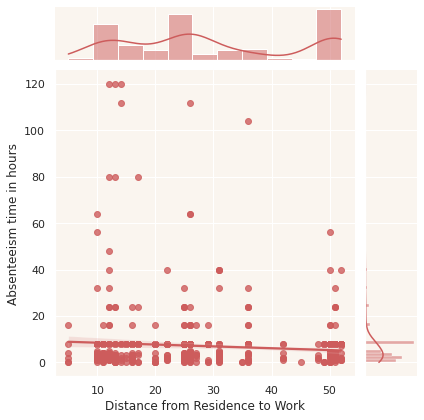

In [ ]:
plt.figure(figsize=(9,5))
sns.jointplot(data=data_preprocessed, 
              x='Distance from Residence to Work',
              y='Absenteeism time in hours', kind='reg',
              color='indianred')

plt.show()

<Figure size 648x360 with 0 Axes>

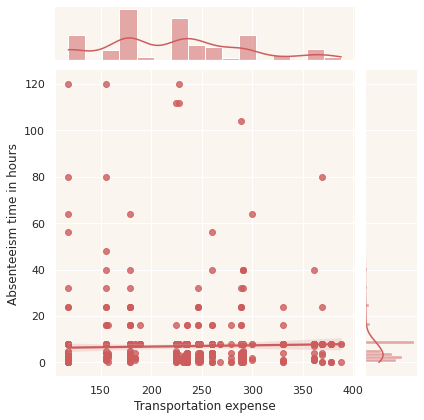

In [ ]:
plt.figure(figsize=(9,5))
sns.jointplot(data=data_preprocessed,
              x='Transportation expense',
              y='Absenteeism time in hours',
              kind='reg', color='indianred')
plt.show()

### Interpreting the Graph:
From two preceeding graphs, the distribution of **Distance from Residence to Work** and **Transportation expense** appears close to the normal distribution, while absenteeism in hours is heavily  right-skewed. This makes the comparison between the variables difficult to interpret.

One problem to tackle this problem is to transform the data into something close to a normal distribution. To perform this transformation, the **Box-Cox** or **Yeo-Johnson** transformations.

## 7.3 Tranforming the Skewness- Yeo-Johnson Transformation:

In [ ]:
from scipy.stats import yeojohnson

hours = yeojohnson(data_preprocessed\
                   ['Absenteeism time in hours'].apply(float))
distances = data_preprocessed\
['Distance from Residence to Work']
expenses = data_preprocessed['Transportation expense']

<Figure size 648x360 with 0 Axes>

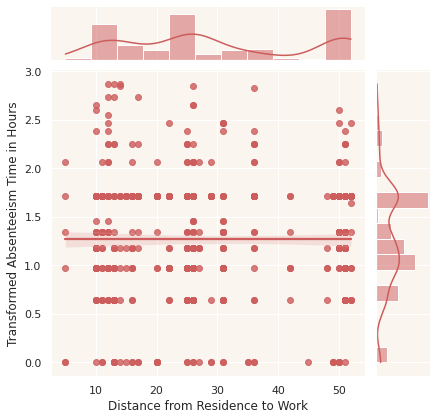

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.jointplot(x=distances,y=hours[0], kind='reg', color='indianred')
ax.set_axis_labels('Distance from Residence to Work',
                   'Transformed Absenteeism Time in Hours')
plt.show()

<Figure size 648x360 with 0 Axes>

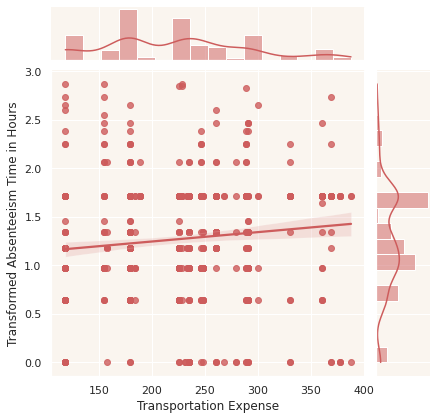

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.jointplot(x=expenses,y=hours[0], kind='reg', color='indianred')
ax.set_axis_labels('Transportation Expense',
                   'Transformed Absenteeism Time in Hours')
plt.show()

Creating **Kernel density estimation(KDE)** plots, these plots will help in visualising the probability density functions of continous variables.

<Figure size 648x360 with 0 Axes>

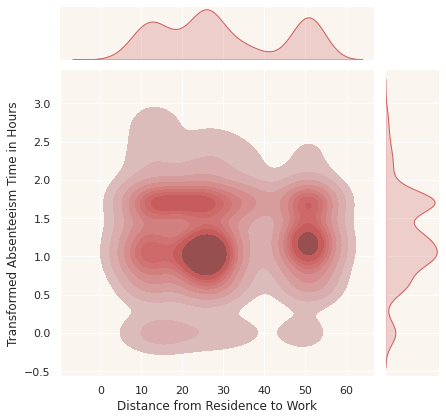

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.jointplot(x=distances,y=hours[0],kind='kde',
                   color='indianred', shade=True, fill=True)
ax.set_axis_labels('Distance from Residence to Work',
         'Transformed Absenteeism Time in Hours')
plt.show()

<Figure size 648x360 with 0 Axes>

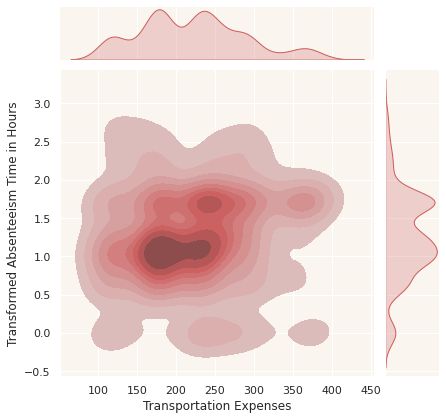

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.jointplot(x=expenses,y=hours[0],kind='kde',
                   color='indianred', shade=True, fill=True)
ax.set_axis_labels('Transportation Expenses',
         'Transformed Absenteeism Time in Hours')
plt.show()

Figures from the **Section 7.3**, we can observe the regression line between the variables is almost flat for the **Distance from Residence to Work** column, which clearly indicates zero correlation,although it has sligh upward slope for **Transportation Expense column, therefore it it has small positive correlation.

## 8 Temporal factors:
Factors such as day of the week and month may also be indicators for absenteeism. For instance, employees might prefer to have their medical examinations on Friday when the workload is lower, and it is closer to the weekend. Analysing the impact of the  Day of the week  and  Month of absence  columns, and their impact on the employees' absenteeism.

## 8.1 Analysing the Number of Entries for Each Day of the Month:


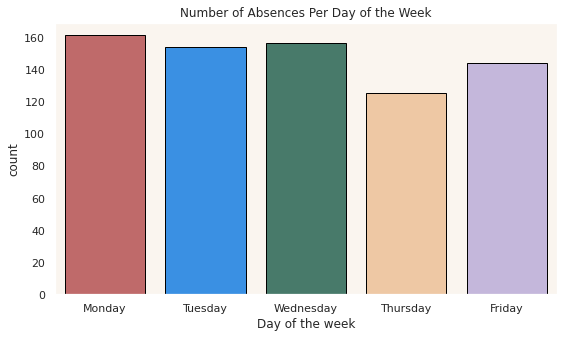

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
colors_new=['indianred','dodgerblue','#40826D','#FAC898','#C3B1E1']
ax = sns.countplot(data= data_preprocessed,
                  x='Day of the week',
            order=['Monday','Tuesday','Wednesday',
                   'Thursday','Friday'],palette=colors_new, 
                   edgecolor='black')
ax.set_title('Number of Absences Per Day of the Week')

plt.show()

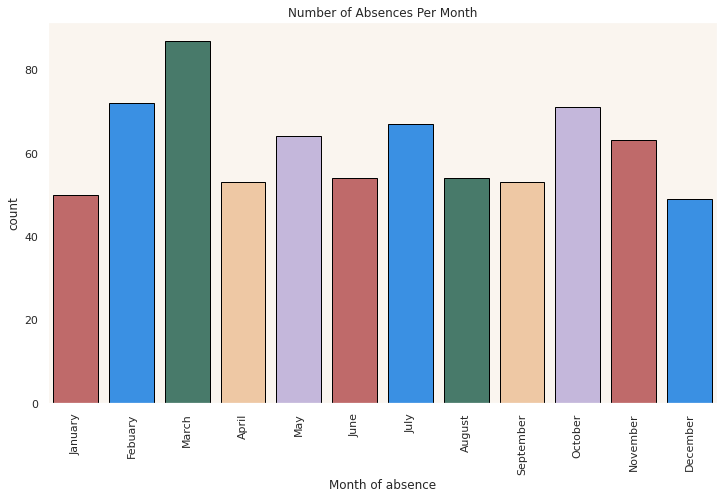

In [ ]:
plt.figure(figsize=(12,7))
plt.grid(False)
ax = sns.countplot(data=data_preprocessed,
                   x='Month of absence',
                   order=['January','Febuary','March','April',
                        'May','June','July','August',
                'September','October','November','December'],
                palette=colors_new, edgecolor='black')
ax.set_title('Number of Absences Per Month')
plt.xticks(rotation=90)
plt.show()

### Interpreting the Graph:
From the preceding plots, we can't really see a substantial difference between the different days of the week or months. It seems that fewer absences occur on Thursday, while the month with the most absences is March, but it is hard to say that the difference is significant.

## 8.2 Analysing Absence Hours- Based on Day of the Week and Month of the Year:

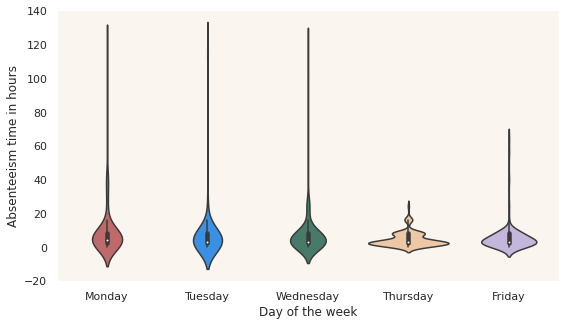

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
sns.violinplot(data=data_preprocessed,
               x='Day of the week',
               y='Absenteeism time in hours',
               order=['Monday','Tuesday','Wednesday',
                   'Thursday','Friday'],
               palette=colors_new, edgecolor='black')
plt.show()

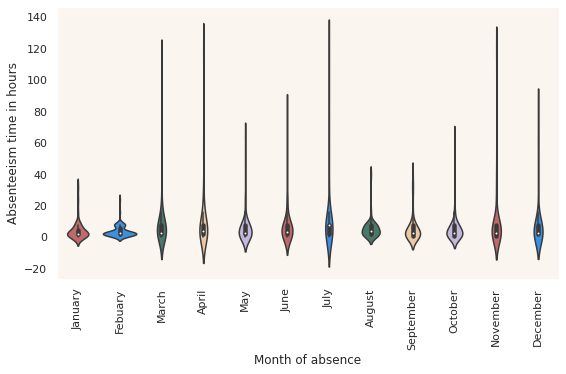

In [ ]:
plt.figure(figsize=(9,5))
plt.grid(False)
sns.violinplot(data=data_preprocessed,
                 x='Month of absence',
                   y='Absenteeism time in hours',
                     palette=colors_new, edgecolor='black',
                   order=['January','Febuary','March','April',
                 'May','June','July','August',
              'September','October','November','December'])
plt.xticks(rotation=90)
plt.show()

## 8.3 Computing the Mean and Standard Deviation of Absences- Based on the Day of The Week and Month of the Year:


In [ ]:
""" 
computing the mean and standard deviation for each day of the week.
"""

dows = ['Monday','Tuesday','Wednesday',
          'Thursday','Friday']
for dow in dows :
    mask = data_preprocessed['Day of the week'] == dow
    hours = data_preprocessed['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f'Day of the Week: {dow:10s} |  Mean: {mean:.03f} | Stddev : {stddev:.03f}')



Day of the Week: Monday     |  Mean: 9.248 | Stddev : 15.973
Day of the Week: Tuesday    |  Mean: 7.981 | Stddev : 18.027
Day of the Week: Wednesday  |  Mean: 7.147 | Stddev : 13.268
Day of the Week: Thursday   |  Mean: 4.424 | Stddev : 4.266
Day of the Week: Friday     |  Mean: 5.125 | Stddev : 7.911


In [ ]:
""" 
Computing the mean and standard deviation for each month of the yar.
"""

months = ['January','Febuary','March','April',
             'May','June','July','August',
               'September','October','November','December']
for month in months:
    mask = data_preprocessed['Month of absence'] == month 
    hours = data_preprocessed['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f'Month: {month:12s} | Mean: {mean:8.03f} | Stddev: {stddev:8.03f}')


Month: January      | Mean:    4.440 | Stddev:    5.786
Month: Febuary      | Mean:    4.083 | Stddev:    3.710
Month: March        | Mean:    8.793 | Stddev:   16.893
Month: April        | Mean:    9.094 | Stddev:   18.024
Month: May          | Mean:    6.250 | Stddev:   10.314
Month: June         | Mean:    7.611 | Stddev:   12.359
Month: July         | Mean:   10.955 | Stddev:   21.547
Month: August       | Mean:    5.333 | Stddev:    5.749
Month: September    | Mean:    5.509 | Stddev:    8.407
Month: October      | Mean:    4.915 | Stddev:    8.055
Month: November     | Mean:    7.508 | Stddev:   16.121
Month: December     | Mean:    8.449 | Stddev:   16.049


Observe that the average duration of the absences is slightly shorter on Thursday (4.424 hours), while absences during July have the longest average duration (10.955 hours). To determine whether these values are statistically significant,that is, whether there is a statistically significant difference regarding the rest of the days/months.

In [ ]:
"""
Computing statistical test for average duration of difference.
"""
thursday_mask = data_preprocessed['Day of the week'] == 'Thursday'
thursday_data = data_preprocessed['Absenteeism time in hours'][thursday_mask]
no_thursday_data = data_preprocessed['Absenteeism time in hours'][~thursday_mask]

july_mask = data_preprocessed['Month of absence'] == 'July'
july_data = data_preprocessed['Absenteeism time in hours'][july_mask]
no_july_data = data_preprocessed['Absenteeism time in hours'][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f'Thursday Test Result: Statistics = {thursday_res[0]:.3f},\
  P-Value = {thursday_res[1]:.3f}')
print(f'July Test Result: Statistics = {july_res[0]:.3f},\
  P-Value = {july_res[1]:.3f}')

Thursday Test Result: Statistics = -2.307,  P-Value = 0.021
July Test Result: Statistics = 2.605,  P-Value = 0.009


Since the P-Values for the statistical test are below the critical value, followings can be concluded:
- There is a statistically significant difference between Thursdays and other days of the week. Absences on Thursday have a shorter duration, on an average.
- Absences during July are the longes over the year. Also, in this case, Null hypothesis testing can be rejected of having no difference.

From the Analysis in this section, it can be safely concluded that the observation about the difference in absenteeism during the month of July and Thursday are correct.

## 9. Analysing Service Time and Son Column:

## 9.1 Investigating Service Time:

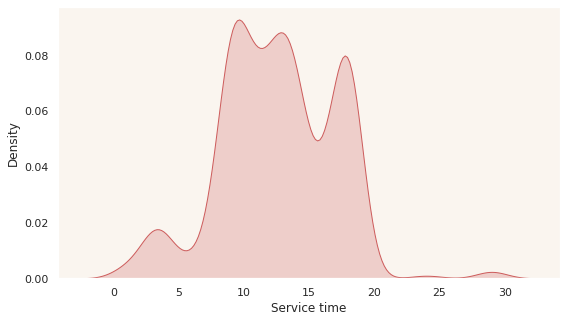

In [ ]:
""" 
Creating KDE plot to visualise Service time column.
"""
plt.figure(figsize=(9,5))
plt.grid(False)
ax = sns.kdeplot(data = data_preprocessed,
                 x='Service time', color='indianred',shade=True)
plt.show()

## 9.2 Analysing Service time against Reason for Absence: 

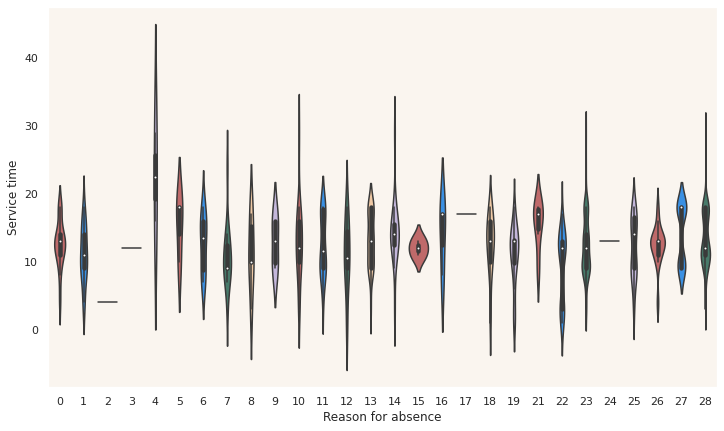

In [ ]:
"""
Creating violin plot for the Service time column, against the 
Reason of Absence.
"""
plt.figure(figsize=(12,7))
plt.grid(False)
sns.violinplot(data=data_preprocessed,
               x='Reason for absence',
               y='Service time', palette=colors_new)
plt.show()

## 9.3 Visualising the Relationship Between Service Time and Absenteeism Time in Hours:


<Figure size 648x360 with 0 Axes>

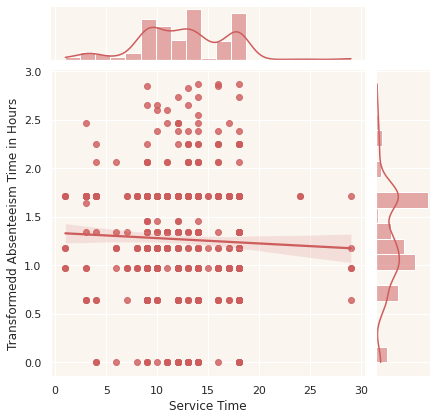

In [ ]:
"""
Plotting the service time against reason for absence to producce,
correlation plot between service time and absenteeism time in hours.
"""
plt.figure(figsize=(9,5))
service_time = data_preprocessed['Service time']
absenteeism_time = yeojohnson(data_preprocessed['Absenteeism time in hours']\
                              .apply(float))[0]
ax = sns.jointplot(x=service_time, y=absenteeism_time,
                   kind='reg', color='indianred')
ax.set_axis_labels('Service Time', 'Transformedd Absenteeism Time in Hours')
plt.show()



## 9.4 Distribution of Service Time with respect to Son column(Number of children):

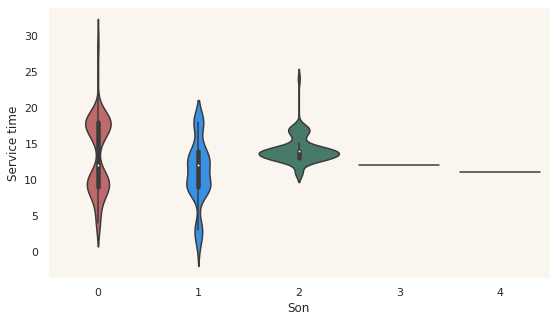

In [ ]:
""" Analysing the distribution of absenteeism time in hours,
per number of children.
"""
plt.figure(figsize=(9,5))
plt.grid(False)
sns.violinplot(data= data_preprocessed, x='Son',
               y='Service time', palette=colors_new)
plt.show()

From this following grapg, we can infer that number of absent hours for employees with greater number of children lies in the range of  10-15 hours. Employees with less than three children appear to be absent in varying range of 1-20 hours.
Specifically employees with no children still have varying number of absent hours within the range pf 10-15 hours, owing to other reasons, which opens up another question for analysis. On the contrary, employees with one children are  absent only for an average of 5 hours.Employees with two children have an average of 15-25 absent hours.

In [ ]:
''' 
Preparing data ML modelling. Classification and Clustering.
'''
data_preprocessed.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,BMI category
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,97,No,High_school,2,Yes,No,1,90,172,30,4,No,obese
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,97,Yes,High_school,1,Yes,No,0,98,178,31,0,No,obese
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,97,No,High_school,0,Yes,No,0,89,170,31,2,No,obese
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,97,No,High_school,2,Yes,Yes,0,68,168,24,4,Yes,healthy weight
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,97,No,High_school,2,Yes,No,1,90,172,30,2,No,obese


In [ ]:
df = data_preprocessed.copy()

In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Disease', 'BMI category'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace('/', ' per ').str.strip()

In [ ]:
df.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average per day,239.554,239.554,239.554,239.554,239.554


In [ ]:
df_pivot = pd.pivot_table(data_num, values=['Tr'])

NameError: ignored